# Python Project

## Project description

In this project I will be using Python to analyzing a questionnaire on the topic of fitness wearable usage and its impacts on lifestyle and overall health. The data was produced from Kaggle. First I will be bringing the data into Python from a CSV file. I will then be cleaning the data and visualizing it using likert scale plots and bar charts. I will also be analyzing the data and commenting on the results at the end. 

I chose this topic due to my personal interest in fitness. I often think of ways to motivate myself and other people on their fitness journeys. This is a small dataset, but I believe we can get a good idea of what benefits a product such as a fitness wearable can bring into one's life.

## Bring in data

#### Import libraries

In [42]:
import pandas as pd
import numpy as np
from IPython.display import display, HTML
import plotly.express as px
import plot_likert

#### Read data

In [43]:
df = pd.read_csv(r'C:\Users\Ville\Documents\GitHub\Ville-s-Portfolio\Fitness Project\Fitness.csv')

#### View data in a Table

As we view the table, we can immediately see that the column names are too long and disrupt the viewing of the dataset. We should adjust the column names and shorten them.

In [44]:
df.head()

,Timestamp,What is your age?,What is your gender?,What is your highest level of education?,What is your current occupation?,How often do you exercise in a week?,How long have you been using a fitness wearable?,How frequently do you use your fitness wearable?,How often do you track fitness data using wearable?,How has the fitness wearable impacted your fitness routine?,...,How engaged do you feel with your fitness wearable?,Does using a fitness wearable make you feel more connected to the fitness community?,How has the fitness wearable helped you achieve your fitness goals?,How has the fitness wearable impacted your overall health?,Has the fitness wearable improved your sleep patterns?,Do you feel that the fitness wearable has improved your overall well-being?,Has using a fitness wearable influenced your decision? [To exercise more?],Has using a fitness wearable influenced your decision? [To purchase other fitness-related products?],Has using a fitness wearable influenced your decision? [To join a gym or fitness class?],Has using a fitness wearable influenced your decision? [To change your diet?]
0,2023/03/30 9:43:19 PM GMT+5:30,18-24,Male,Some college or associate degree,Student,5 or more times a week,Less than 6 months,Daily,Every day,Positively impacted my fitness routine,...,Very engaged,Agree,No impact on achieving my goals,No impact on my overall health,Agree,Neutral,Strongly agree,Neutral,Agree,Agree
1,2023/03/31 5:07:46 PM GMT+5:30,Under 18,Male,Bachelor's degree,Student,5 or more times a week,Less than 6 months,3-4 times a week,Once a week,Positively impacted my fitness routine,...,Somewhat engaged,Agree,Helped me achieve my goals somewhat more quickly,Improved my overall health somewhat,Agree,Strongly agree,Agree,Neutral,Neutral,Neutral
2,2023/03/31 7:44:46 PM GMT+5:30,18-24,Female,Bachelor's degree,Student,Less than once a week,Less than 6 months,Rarely,Rarely,Positively impacted my fitness routine,...,Not very engaged,Strongly agree,Helped me achieve my goals much more quickly,Improved my overall health significantly,Strongly agree,Strongly agree,Agree,Agree,Strongly agree,Agree
3,2023/03/31 9:36:07 PM GMT+5:30,25-34,Female,Some college or associate degree,Employed part-time,3-4 times a week,6-12 months,3-4 times a week,Every day,I don't know,...,Somewhat engaged,Strongly agree,Helped me achieve my goals somewhat more quickly,Improved my overall health somewhat,Agree,Strongly agree,Agree,Disagree,Neutral,Agree
4,2023/03/31 9:37:32 PM GMT+5:30,18-24,Male,Bachelor's degree,Student,1-2 times a week,Less than 6 months,Daily,Every other day,Positively impacted my fitness routine,...,Neutral,Agree,Helped me achieve my goals much more quickly,Improved my overall health significantly,Agree,Strongly agree,Agree,Neutral,Agree,Strongly agree


## Data cleaning

#### Print the column names
As we cant see all of the column names in the table above, we can print them out for an easier time when shortening them.

In [45]:
print(df.columns)

Index(['Timestamp', 'What is your age?', 'What is your gender?',
       'What is your highest level of education?',
       'What is your current occupation?',
       'How often do you exercise in a week?',
       'How long have you been using a fitness wearable?',
       'How frequently do you use your fitness wearable?',
       'How often do you track fitness data using wearable?',
       'How has the fitness wearable impacted your fitness routine?',
       'Has the fitness wearable helped you stay motivated to exercise?',
       'Do you think that the fitness wearable has made exercising more enjoyable?',
       'How engaged do you feel with your fitness wearable?',
       'Does using a fitness wearable make you feel more connected to the fitness community?',
       'How has the fitness wearable helped you achieve your fitness goals?',
       'How has the fitness wearable impacted your overall health?',
       'Has the fitness wearable improved your sleep patterns?',
       'Do you f

#### Rename the columns

I then proceeded to rename the columns. As there can be many columns and thinking of a proper name for all of them can take time, I asked ChatGPT for suggestion, which i then modified to my liking. While I do not have a massive amount of columns and I could have renamed all of them myself, using AI to your advantage can save a lot of time in the long run. It is still important to check the AI generated results.

In [46]:
df.rename(columns={
    'Timestamp': 'Time',
    'What is your age?': 'Age',
    'What is your gender?': 'Gender',
    'What is your highest level of education?': 'Education',
    'What is your current occupation?': 'Occupation',
    'How often do you exercise in a week?': 'Exercise Frequency',
    'How long have you been using a fitness wearable?': 'Wearable Use Duration',
    'How frequently do you use your fitness wearable?': 'Wearable Frequency',
    'How often do you track fitness data using wearable?': 'Data Tracking Frequency',
    'How has the fitness wearable impacted your fitness routine?': 'Routine Impact',
    'Has the fitness wearable helped you stay motivated to exercise?': 'Motivation Impact',
    'Do you think that the fitness wearable has made exercising more enjoyable?': 'Enjoyment Improvement',
    'How engaged do you feel with your fitness wearable?': 'Engagement Level',
    'Does using a fitness wearable make you feel more connected to the fitness community?': 'Community Improvement',
    'How has the fitness wearable helped you achieve your fitness goals?': 'Goal Impact',
    'How has the fitness wearable impacted your overall health?': 'Health Impact',
    'Has the fitness wearable improved your sleep patterns?': 'Sleep Improvement',
    'Do you feel that the fitness wearable has improved your overall well-being?': 'Well-being Improvement',
    'Has using a fitness wearable influenced your decision? [To exercise more?]': 'Exercise Influence',
    'Has using a fitness wearable influenced your decision? [To purchase other fitness-related products?]': 'Fitness Purchase Influence',
    'Has using a fitness wearable influenced your decision? [To join a gym or fitness class?]': 'Fitness Class Influence',
    'Has using a fitness wearable influenced your decision? [To change your diet?]': 'Diet Influence'
}, inplace=True)

#### Check for missing data

It is important to check whether there is any missing data on the dataset as this can easily affect the results later on. We can see below that there is no data missing from the table.

In [47]:
for col in df.columns:
    percentage_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, percentage_missing))

Time - 0.0%
Age - 0.0%
Gender - 0.0%
Education - 0.0%
Occupation - 0.0%
Exercise Frequency - 0.0%
Wearable Use Duration - 0.0%
Wearable Frequency - 0.0%
Data Tracking Frequency - 0.0%
Routine Impact - 0.0%
Motivation Impact - 0.0%
Enjoyment Improvement - 0.0%
Engagement Level - 0.0%
Community Improvement - 0.0%
Goal Impact - 0.0%
Health Impact - 0.0%
Sleep Improvement - 0.0%
Well-being Improvement - 0.0%
Exercise Influence - 0.0%
Fitness Purchase Influence - 0.0%
Fitness Class Influence - 0.0%
Diet Influence - 0.0%


#### Check for data types

We should also check whether the data types match the data in the table. As we can see all of the datatypes are as "object". I do not agree having my Time column as this data type so I will be changing it into datetime format. I will also be changing the object data types into string format. This is because it might help with some functions later on.

In [48]:
df.dtypes

Time                          object
Age                           object
Gender                        object
Education                     object
Occupation                    object
Exercise Frequency            object
Wearable Use Duration         object
Wearable Frequency            object
Data Tracking Frequency       object
Routine Impact                object
Motivation Impact             object
Enjoyment Improvement         object
Engagement Level              object
Community Improvement         object
Goal Impact                   object
Health Impact                 object
Sleep Improvement             object
Well-being Improvement        object
Exercise Influence            object
Fitness Purchase Influence    object
Fitness Class Influence       object
Diet Influence                object
dtype: object

#### Change the data types and formatting

I first changed all of the columns with the object data type into string data type. Then I proceeded to change the "Time" column into a "Date" column where the cells are formatted as "yyyy/mm/dd" as previously it was formatted like "yyyy/mm/dd h:min:sec PM/AM GMT+5:30". I changed this as there is no need for such a specific time column. While doing this, I will also change its data type into datetime format. 

In [49]:
# Step 1: Convert all object columns to string data type
object_columns = df.select_dtypes(include='object').columns
df[object_columns] = df[object_columns].astype('string')

df.rename(columns={'Time': 'Date'}, inplace=True)

df['Date'] = df['Date'].str.replace(r' GMT[+-]\d{1,2}:\d{2}', '', regex=True)
df['Date'] = pd.to_datetime(df['Date'], format='%Y/%m/%d %I:%M:%S %p', errors='coerce')

print(df.dtypes)

df['Date'] = df['Date'].dt.strftime('%Y/%m/%d')

date_df = df[['Date']].head(5)
display(date_df)

Date                          datetime64[ns]
Age                           string[python]
Gender                        string[python]
Education                     string[python]
Occupation                    string[python]
Exercise Frequency            string[python]
Wearable Use Duration         string[python]
Wearable Frequency            string[python]
Data Tracking Frequency       string[python]
Routine Impact                string[python]
Motivation Impact             string[python]
Enjoyment Improvement         string[python]
Engagement Level              string[python]
Community Improvement         string[python]
Goal Impact                   string[python]
Health Impact                 string[python]
Sleep Improvement             string[python]
Well-being Improvement        string[python]
Exercise Influence            string[python]
Fitness Purchase Influence    string[python]
Fitness Class Influence       string[python]
Diet Influence                string[python]
dtype: obj

,Date
0,2023/03/30
1,2023/03/31
2,2023/03/31
3,2023/03/31
4,2023/03/31


#### Reformat the rest of the cells

To get a better idea of what kind of different answers each column has, I created a list of all of the distinct answers for each column. Using an HTML display, we can view it without creating an overwhelmingly long list.

In [50]:
distinct_values_list = []
for column in df.columns:
    distinct_values = df[column].drop_duplicates().dropna().tolist()
    for value in distinct_values:
        distinct_values_list.append({'Column Name': column, 'Distinct Value': value})

distinct_values_df = pd.DataFrame(distinct_values_list)

scrollable_html = distinct_values_df.to_html(index=False)
display(HTML(f'<div style="overflow-y: scroll; height: 400px;">{scrollable_html}</div>'))

Column Name,Distinct Value
Date,2023/03/30
Date,2023/03/31
Date,2023/04/02
Date,2023/04/06
Date,2023/04/07
Age,18-24
Age,Under 18
Age,25-34
Age,35-44
Age,45-54


We can see that for each improvement or impact column, the answers could be reformatted into aligning formats across similar questions. I decided to change all of the likert scale like questions to align with the (Strongly disagree - Strongly agree) scale. This will make the plotting later on a much more straightforward process. This will also help the reader to understand the plotting better as the scale stays consistent throughout the analysis. I also changed the answers in the "Education" column by shortening them. 

In [51]:

replacements = {
    'Goal Impact': {
        "No impact on achieving my goals": "Disagree",
        "Helped me achieve my goals somewhat more quickly": "Agree",
        "Helped me achieve my goals much more quickly": "Strongly agree"
    },
    'Health Impact': {
        "No impact on my overall health": "Disagree",
        "Improved my overall health somewhat": "Agree",
        "Improved my overall health significantly": "Strongly agree",
        "I don't know": "Neutral"
    },
    'Engagement Level': {
        "Not very engaged": "Disagree",
        "Somewhat engaged": "Agree",
        "Very engaged": "Strongly agree"
    },
    'Routine Impact': {
        "Negatively impacted my fitness routine": "Disagree",
        "Positively impacted my fitness routine": "Agree",
        "I don't know": "Neutral",
        "No impact on my fitness routine": "Neutral"
    },
    'Education': {
        "Some college or associate degree": "College or Associate",
        "Bachelor's degree": "Bachelors",
        "Master's degree": "Masters",
        "High school diploma": "High School",
        "Doctorate or professional degree": "Doctorate or Professional"
    }
}

for column, values in replacements.items():
    df[column] = df[column].replace(values)

scrollable_df= df.to_html(index=False)
display(HTML(f'<div style="overflow-y: scroll; height: 400px;">{scrollable_df}</div>'))

Date,Age,Gender,Education,Occupation,Exercise Frequency,Wearable Use Duration,Wearable Frequency,Data Tracking Frequency,Routine Impact,Motivation Impact,Enjoyment Improvement,Engagement Level,Community Improvement,Goal Impact,Health Impact,Sleep Improvement,Well-being Improvement,Exercise Influence,Fitness Purchase Influence,Fitness Class Influence,Diet Influence
2023/03/30,18-24,Male,College or Associate,Student,5 or more times a week,Less than 6 months,Daily,Every day,Agree,Strongly agree,Strongly agree,Strongly agree,Agree,Disagree,Disagree,Agree,Neutral,Strongly agree,Neutral,Agree,Agree
2023/03/31,Under 18,Male,Bachelors,Student,5 or more times a week,Less than 6 months,3-4 times a week,Once a week,Agree,Neutral,Agree,Agree,Agree,Agree,Agree,Agree,Strongly agree,Agree,Neutral,Neutral,Neutral
2023/03/31,18-24,Female,Bachelors,Student,Less than once a week,Less than 6 months,Rarely,Rarely,Agree,Strongly agree,Agree,Disagree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Agree,Agree,Strongly agree,Agree
2023/03/31,25-34,Female,College or Associate,Employed part-time,3-4 times a week,6-12 months,3-4 times a week,Every day,Neutral,Strongly agree,Agree,Agree,Strongly agree,Agree,Agree,Agree,Strongly agree,Agree,Disagree,Neutral,Agree
2023/03/31,18-24,Male,Bachelors,Student,1-2 times a week,Less than 6 months,Daily,Every other day,Agree,Neutral,Agree,Neutral,Agree,Strongly agree,Strongly agree,Agree,Strongly agree,Agree,Neutral,Agree,Strongly agree
2023/03/31,18-24,Female,Masters,Employed full-time,5 or more times a week,1-2 years,Daily,Every day,Agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Agree,Strongly agree,Strongly agree
2023/03/31,18-24,Male,Bachelors,Student,Less than once a week,1-2 years,1-2 times a week,Once a week,Agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Neutral,Neutral,Neutral,Neutral
2023/04/02,18-24,Female,Bachelors,Student,Less than once a week,Less than 6 months,Daily,Once a month,Neutral,Agree,Agree,Strongly agree,Strongly agree,Agree,Agree,Agree,Agree,Agree,Disagree,Agree,Agree
2023/04/02,18-24,Male,High School,Employed part-time,1-2 times a week,Less than 6 months,1-2 times a week,Every other day,Agree,Strongly agree,Agree,Strongly agree,Neutral,Strongly agree,Strongly agree,Agree,Agree,Neutral,Agree,Agree,Agree
2023/04/02,35-44,Male,High School,Employed full-time,Less than once a week,6-12 months,Daily,Every day,Agree,Strongly agree,Strongly agree,Strongly agree,Agree,Strongly agree,Agree,Neutral,Neutral,Strongly agree,Agree,Strongly agree,Strongly agree


#### Saving the cleaned data

Before going into visualization, I will be saving the cleaned dataset above.

In [52]:
cleaned_df = df.dropna()

cleaned_df.to_csv('Fitness data.csv', index=False)

print("New file with cleaned data has been saved.")

New file with cleaned data has been saved.


## Visualizing data

#### Fitness time usage

First I will be covering the time usage part of the fitness questionnaire. This will cover exercise frequency and the frequency of tracking data gathered with the wearable as those are the two metrics that I am most interested in. I will be covering these topics based on age, gender and education.

In [53]:
exercise_frequency_order = ['Less than once a week', '1-2 times a week', '3-4 times a week', '5 or more times a week']
age_order = ['Under 18', '18-24', '25-34', '35-44', '45-54', '55-64']

age_counts = df['Age'].value_counts().reindex(age_order)
print("Count of each age group:")
print(age_counts)

frequency_counts = df.groupby(['Exercise Frequency', 'Age']).size().reset_index(name='Count')
exercise_frequency_order = ['Less than once a week', '1-2 times a week', '3-4 times a week', '5 or more times a week']
age_order = ['Under 18', '18-24', '25-34', '35-44', '45-54', '55-64']

fig = px.bar(
    frequency_counts,
    x='Exercise Frequency', 
    y='Count', 
    color='Age', 
    title='Exercise Frequency by Age',
    labels={'Count': 'Number of People'},
    category_orders={
        'Exercise Frequency': exercise_frequency_order,
        'Age': age_order
    }
)

fig.show();

Count of each age group:
Age
Under 18     5
18-24       10
25-34        6
35-44        4
45-54        3
55-64        2
Name: count, dtype: Int64


As we can see above the plot, the largest age group by the amount of questionnaire answers is 18-24. This is why it is important to notice that while there are more 18-24 year olds exercising 5 or more times a week than most age groups, their average still falls under the 3-4 times a week threshold. Under 18 year olds seem to be exercising 3 or more times a week on average, which I believe was quite expected. 25-34 year olds have no representation in the 5 or more times a week category, but we can see that majority in that age group still exercise 3-4 times a week. The largest representation out of the 35-44 year olds fall in the "Less than once a week" category which is concerning, but half of the answerers in that age group do exercise atleast 3 times a week. 45-54 year olds seem to exercise on average 1-2 times a week. 55-64 year old only have two answerers, but those two people have an impressive average of 3-4 times a week. 

Based on this graph we can say that the correlation between age and exercise frequency is not significant. Each age group has spread across multiple categories within the exercise frequency category. 

In [54]:
exercise_frequency_order = ['Less than once a week', '1-2 times a week', '3-4 times a week', '5 or more times a week']
gender_order = ['Male', 'Female', 'Prefer not to say']

gender_counts = df['Gender'].value_counts().reindex(gender_order) 
print("Count of each gender group:")
print(gender_counts)

gender_frequency_counts = df.groupby(['Exercise Frequency', 'Gender']).size().reset_index(name='Count')

fig = px.bar(
    gender_frequency_counts,
    x='Exercise Frequency', 
    y='Count', 
    color='Gender', 
    title='Exercise Frequency by Gender',
    labels={'Count': 'Number of People'},
    category_orders={
        'Exercise Frequency': exercise_frequency_order,
        'Gender': gender_order
    }
)

fig.show();

Count of each gender group:
Gender
Male                 13
Female               15
Prefer not to say     2
Name: count, dtype: Int64


The Excercise Frequencty is spread quite evenly based on gender as well. While slightly over half of the female answerers exercise more than 3 times a week, only around 40% of the men do so. Men balance this out a little bit by having more people in the "1-2 times a week" category and less people in the "Less than once a week" category than women. Two people preferred to not say their gender, but both of those people are exercise frequently. Overall the female gender is more active based on this questionnaire.

In [55]:
data_tracking_frequency = ['Rarely', 'Once a month', 'Once a week', 'Every other day', 'Every day']
education_order = ['Doctorate or Professional', 'Masters', 'Bachelors', 'High School', 'Less than high school']

education_counts = df['Education'].value_counts().reindex(education_order) 
print("Count of each education group:")
print(education_counts)

education_frequency_counts = df.groupby(['Data Tracking Frequency', 'Education']).size().reset_index(name='Count')

fig = px.bar(
    education_frequency_counts,
    x='Data Tracking Frequency', 
    y='Count', 
    color='Education', 
    title='Data Tracking Frequency by Education',
    labels={'Count': 'Number of People'},
    category_orders={
        'Data Tracking Frequency': data_tracking_frequency,
        'Education': education_order
    }
)

fig.show();

Count of each education group:
Education
Doctorate or Professional    6
Masters                      5
Bachelors                    8
High School                  6
Less than high school        1
Name: count, dtype: Int64


My expectations for this graph was to see mostly people with higher education tracking their fitness data. This is because I believed higher educated people to be more in line with analytical thinking which would make them more interested in statistics. This hypothesis doesnt seem to hold based on this questionnaire as people with either doctorate or professional degrees track their data on average less than the people with only high school diplomas. There seems to be no correlation between education and data tracking frequency.  From the graph we can tell that most people in the questionnaire track their data atleast once a week, while the highest representation is in the "Every day" category.

#### Likert scale

Plotting likert scale for (Strongly disagree - Strongly agree) scale responses.

<Axes: xlabel='Number of Responses'>

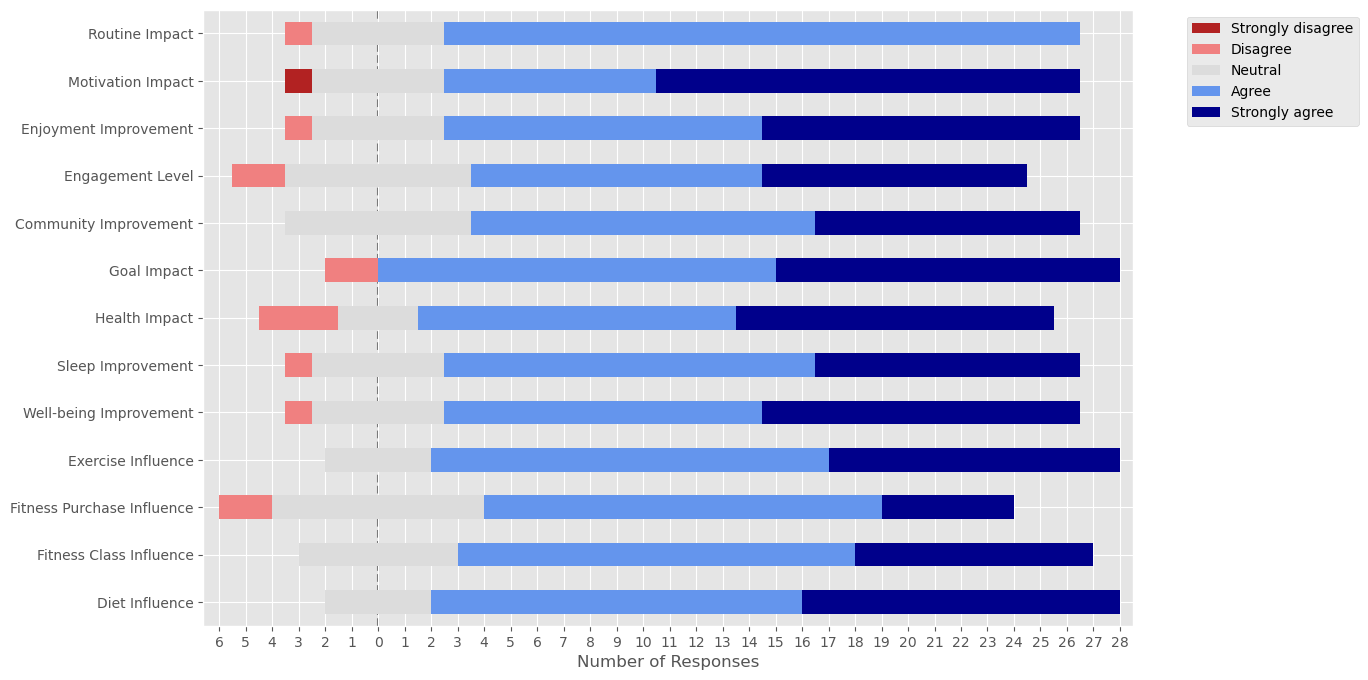

In [56]:
selected_columns = ['Routine Impact',
'Motivation Impact',
'Enjoyment Improvement',
'Engagement Level',
'Community Improvement',
'Goal Impact',
'Health Impact',
'Sleep Improvement',
'Well-being Improvement',
'Exercise Influence',
'Fitness Purchase Influence',
'Fitness Class Influence',
'Diet Influence']
likert = df[selected_columns]

another_scale = \
    ['Strongly disagree',
     'Disagree',
     'Neutral',
     'Agree',
     'Strongly agree']

plot_likert.plot_likert(likert, another_scale)

#### Describing likert results

Has the fitness wearable had a positive impact on your fitness routine? 

- A vast majority of people seem to think that there is a positive impact on their fitness routine but no one thinks that the effects are particularly strong.

Has the fitness wearable helped you stay motivated to exercise?

- Most people have strongly agreed that a fitness wearable has increased their motivation towards exercising. One person has strongly disagreed with this statement. 

Do you think that the fitness wearable has made exercising more enjoyable?

- Around a third of the people strongly agree with the statement that exercising has become more enjoyable with a fitness wearable. Another third also agrees with it. One answerer has disagreed.

Do you feel engaged with your fitness wearable?

- Majority of people feel engaged wearing a fitness wearable. This majority has split in half between agreeing and strongly agreeing. Two people have disagreed.

Using a fitness wearable makes you feel more connected to the fitness community?

- No one has disagreed with feeling more connected to the fitness community while using a fitness wearable. Large portion feel neutral on the topic, but most people agree or strongly agree.

Fitness wearable has helped you achieve your fitness goals?

- On the Fitness wearables impact on achieving goals, the opinions seem to have been stronger as there are no neutral answers. Around half of the people agree with the statement. Two people disagree and the rest agree strongly on the topic.

Fitness wearable has had a positive impact on your overall health?

- While the opinions are yet again overwhelmingly positive, this topic has gained the most disagreeing votes on the poll. A lot of people seem to think that a fitness wearable does impact their health positively.

Fitness wearable has improved your sleep patterns?

- Again a vast majority of people see using a fitness wearable beneficial for their sleep patterns.

Fitness wearable has improved your overall well-being?

- The answers on the impact on well-being are quite similar to the question about health impact except that only one person disagrees. Most of the people agree or strongly agree with the statement. 

Using a fitness wearable has positively influenced your decision to exercise more?

- No one has disagreed on the fitness wearable's positive influence on exercising more. Most people agree or strongly agree.

Using a fitness wearable has positively influenced your decision to purchase other fitness-related products?

- Two people have disagreed with purchasing other fitness-related products and a large portion are neutral on the topic. Most people have agreed.

Using a fitness wearable has positively influenced your decision to join a gym or fitness class?

- Around half of the people think the fitness wearable has influenced them to join a gym or fitness class. No one disagrees with the statement.

Using a fitness wearable has positively influenced your decision to change your diet?

- No one disagrees with the positive influence on diet either. Around one third of the people strongly agree and a little over a quarter agree.

The overall consensus around the effects of a fitness wearable are overwhelmingly positive. Most people seem to think using one has a large positive influence on a lot of aspects on one's health. These include exercising, dieting, health and overall well-being. The fitness wearable seems to also work great as a motivator and as something that connects you with other people in the fitness world. Based on this data, a fitness wearable would be a worthy purchase for anyone seeking to improve their life quality through the means of fitness and lifestyle improvements.

## Final words

This project was created mainly as a means of Python practice, but I chose this dataset as I am personally interested in fitness and often think how to motivate people around me that I care for. I myself bought a fitness wearable at the beginning of my fitness journey and saw major improvements in my motivation. It is extremely motivating as you are able to see your own progress in numbers and graphs instead of having to rely on gut feeling. I was pleased to see that a lot of other people agree with my thought on this subject matter and I can more confidently recommend fitness wearables to my friends and family. This project can also work as a proof that sometimes it is worth it to invest in some equipment in fitness even if it could feel like a waste of money at first. 

This is not to say that fitness wearables are compatible with everyone as we could see from the data. The group of subjects in this dataset was quite small, yet there were some people who disagreed with the positive effects of a fitness wearable. There were also a lot neutral answers, which means that some people had not realized a positive effect, but also had not felt negative thoughts towards the product.

The dataset was small and quite straightforward, which made a more extensive analysis difficult. I do still think that this was a great learning project as pretty much all the values were non-numerical. This made it personally more challenging to think of ways to plot the answers. The likert scale library as well as the scrollable HTML tables were some great discoveries I made during this project. While this was a relatively simple and fun project about a personal interest, this gives me confidence to move onto some more diffcult topics and datasets in the future.